In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [33]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)
model_name = "linear_regression"
display_name = "Linear Regression"

In [34]:
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', LinearRegression())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,'dataset:')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [35]:
def save_model(model,method):
    with open('CrimeGUI/Models/' + model_name + method,'wb') as file:
        pickle.dump(model,file)

<h3> Linear Regression with F-Regression Dataset <h3>

In [36]:
# can go straight into full training dataset due to speed of algorithm
is_sample = False
num_folds = 10
args = {}

In [37]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.



Best score for Linear Regression with _f_regression dataset: 0.7439901710700152

Best hyperparameters for Linear Regression with _f_regression dataset:
memory : None
steps : [('clf', LinearRegression())]
verbose : False
clf : LinearRegression()
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : False

Prediction scores for Linear Regression using _f_regression dataset:
Mean Squared error: 4.84282905293272
Mean Absolute error: 1.3789992709632717
R^2: 0.7515509865091387


[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    2.8s finished


In [38]:
# Hyperparameter tuning
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [39]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _f_regression dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.6s finished



Best score for Linear Regression with _f_regression dataset: 0.7439901710700154

Best hyperparameters for Linear Regression with _f_regression dataset:
memory : None
steps : [('clf', LinearRegression(normalize=True))]
verbose : False
clf : LinearRegression(normalize=True)
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : True

Prediction scores for Linear Regression using _f_regression dataset:
Mean Squared error: 4.842829052932722
Mean Absolute error: 1.3789992709632786
R^2: 0.7515509865091385


In [40]:
# Accuracy unchanged, final model saved
save_model(f_reg_model,sel_methods[0])

<h3> Linear Regression with Chi-Squared Feature Selected Dataset <h3>

In [41]:
# Final hyperparameter tuning as all hyperparameters are binary
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [42]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _chi2 dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.5s finished



Best score for Linear Regression with _chi2 dataset: 0.7277523962423127

Best hyperparameters for Linear Regression with _chi2 dataset:
memory : None
steps : [('clf', LinearRegression(normalize=True))]
verbose : False
clf : LinearRegression(normalize=True)
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : True

Prediction scores for Linear Regression using _chi2 dataset:
Mean Squared error: 5.254872532952907
Mean Absolute error: 1.4527229062655547
R^2: 0.7304121449338072


In [43]:
#Final model saved
save_model(chi2_model,sel_methods[1])

<h3> Linear Regression with AdaBoost Feature Selected Dataset <h3>

In [44]:
# Final hyperparameter tuning as all hyperparameters are binary
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [45]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _adaboost dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  65 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.6s finished



Best score for Linear Regression with _adaboost dataset: 0.7410811514845907

Best hyperparameters for Linear Regression with _adaboost dataset:
memory : None
steps : [('clf', LinearRegression(normalize=True))]
verbose : False
clf : LinearRegression(normalize=True)
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : True

Prediction scores for Linear Regression using _adaboost dataset:
Mean Squared error: 4.964608128641909
Mean Absolute error: 1.3904867078383014
R^2: 0.745303421110262


In [46]:
#Final model saved
save_model(chi2_model,sel_methods[2])

<h3> Linear Regression with Equal Business and Crime Incident Feature Selected Dataset <h3>

In [47]:
# Final hyperparameter tuning as all hyperparameters are binary
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [48]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _equal_crime_and_business dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.6s finished



Best score for Linear Regression with _equal_crime_and_business dataset: 0.7284944980291057

Best hyperparameters for Linear Regression with _equal_crime_and_business dataset:
memory : None
steps : [('clf', LinearRegression(normalize=True))]
verbose : False
clf : LinearRegression(normalize=True)
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : True

Prediction scores for Linear Regression using _equal_crime_and_business dataset:
Mean Squared error: 5.135861372359901
Mean Absolute error: 1.4188595307686909
R^2: 0.7365177094954614


<h3> Retrain on revised dataset <h3>

In [49]:
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [50]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3] + "_revised", args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _equal_crime_and_business_revised dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.6s finished



Best score for Linear Regression with _equal_crime_and_business_revised dataset: 0.7286556514747289

Best hyperparameters for Linear Regression with _equal_crime_and_business_revised dataset:
memory : None
steps : [('clf', LinearRegression(normalize=True))]
verbose : False
clf : LinearRegression(normalize=True)
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : True

Prediction scores for Linear Regression using _equal_crime_and_business_revised dataset:
Mean Squared error: 5.134488653522186
Mean Absolute error: 1.4188181598780056
R^2: 0.7365881333401403


In [51]:
#Final model saved
save_model(chi2_model,sel_methods[3])

<h3> Linear Regression with All Business Feature Selected Dataset <h3>

In [52]:
# Final hyperparameter tuning as all hyperparameters are binary
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [53]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _all_business dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.6s finished



Best score for Linear Regression with _all_business dataset: 0.44996200683603743

Best hyperparameters for Linear Regression with _all_business dataset:
memory : None
steps : [('clf', LinearRegression(normalize=True))]
verbose : False
clf : LinearRegression(normalize=True)
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : True

Prediction scores for Linear Regression using _all_business dataset:
Mean Squared error: 10.685789821182226
Mean Absolute error: 1.8508237579583586
R^2: 0.45179276195271156


<h3> Retrain on revised dataset <h3>

In [54]:
# Final hyperparameter tuning as all hyperparameters are binary
is_sample = False
num_folds = 10
args = {'clf__copy_X':(True,False),
         'clf__fit_intercept':(True,False),
         'clf__normalize':(True,False)}

In [55]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4] + "_revised", args, num_folds, is_sample)



Running cross fold validation for Linear Regression with _all_business_revised dataset
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.6s finished



Best score for Linear Regression with _all_business_revised dataset: 0.44969645031959826

Best hyperparameters for Linear Regression with _all_business_revised dataset:
memory : None
steps : [('clf', LinearRegression())]
verbose : False
clf : LinearRegression()
clf__copy_X : True
clf__fit_intercept : True
clf__n_jobs : None
clf__normalize : False

Prediction scores for Linear Regression using _all_business_revised dataset:
Mean Squared error: 10.730811101246845
Mean Absolute error: 1.8568413249581706
R^2: 0.44948305981458303


In [56]:
#Final model saved
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [57]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

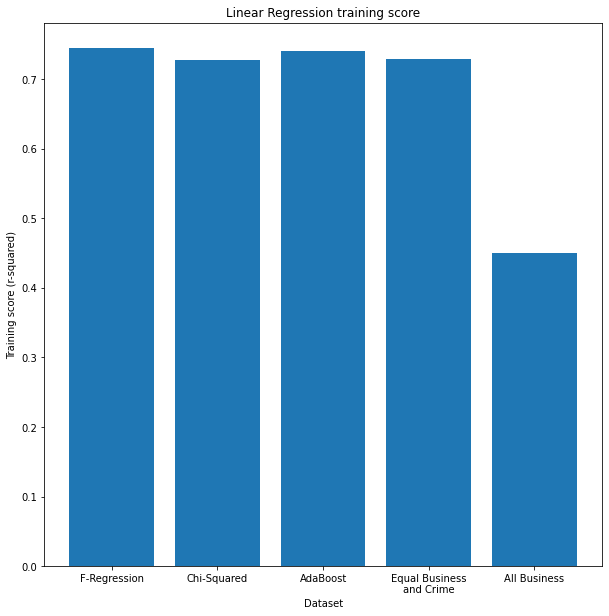

In [58]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

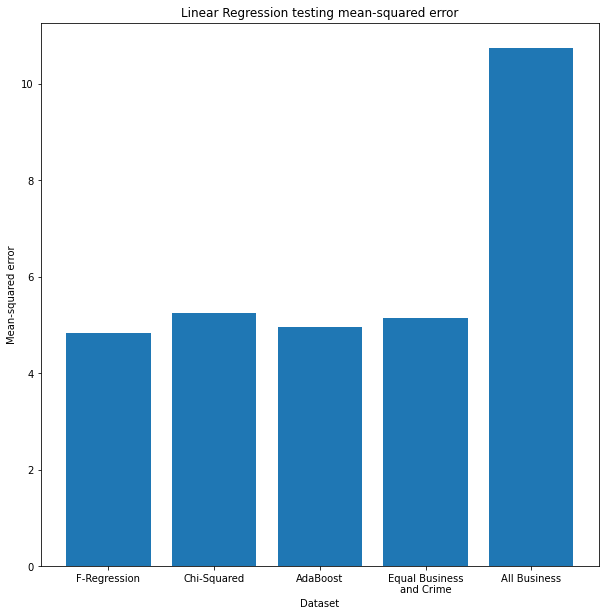

In [59]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

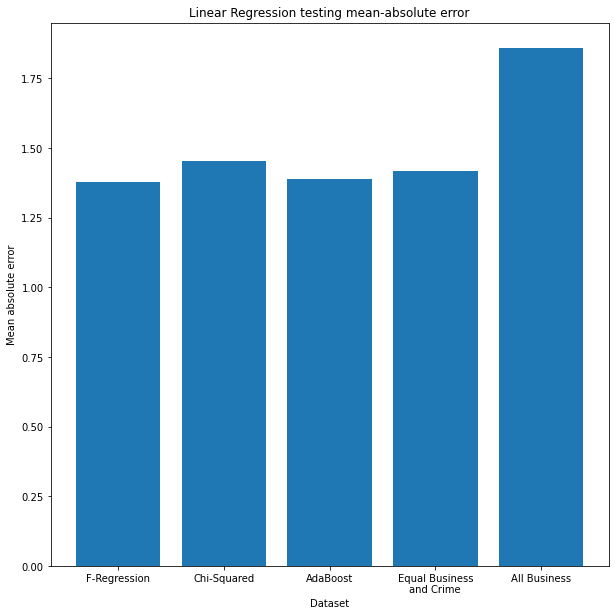

In [60]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

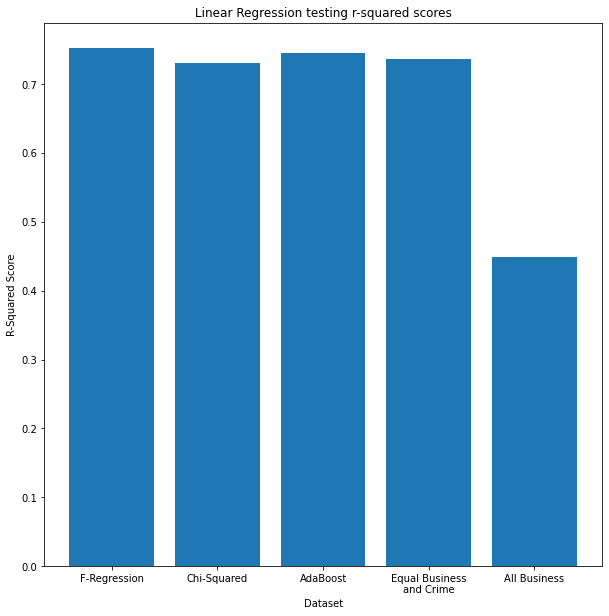

In [61]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)

In [62]:
# f-regression dataset predicts best, closely followed by Adaboost, all business performs worst